# Multiply two list by loop

In [ ]:
# Write your cod

-----

# Meal review - Basic data analysis
-----
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories.

## Import library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./amazon-fine-food-reviews"))

# Any results you write to the current directory are saved as output.

['test.py', 'Reviews.csv', 'database.sqlite', 'hashes.txt']


-----
# Practice 1 - Peek for the dataset
-----

- Datapath = "../input/Reviews.csv"
- Using **pandas** to do the following task


## 1.1 Using pandas to read data from the csv file

In [2]:
# The data path of input file
data_path = "./amazon-fine-food-reviews/Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

type(pd_data)

pandas.core.frame.DataFrame

## 1.2 Preview the data
-----
## Preview the first 5 rows of the dataset


In [3]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



## The size of the dataset

In [4]:
pd_data.shape

(568454, 10)

## The column names

In [5]:
pd_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Read one column from DataFrame
- We read the column "Score" from dataframe "pd_data"
- Now, we have the Series "scores" 

In [6]:
scores = pd_data["Score"]
scores[:10], type(scores)

(0    5
 1    1
 2    4
 3    2
 4    5
 5    4
 6    5
 7    5
 8    5
 9    5
 Name: Score, dtype: int64, pandas.core.series.Series)

## Plot the distribution of the column "Score"

In [7]:
pd_data['Score'].hist(bins=5)

## Show the reviews by "Seanna"

In [276]:
pd_data[pd_data.ProfileName == 'Seanna']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,score
16665,16666,B001LGGH40,A12E0Y0J6584RT,Seanna,0,0,4,1238544000,Switch to Something New!,Switch is a wonderful all natural carbonated f...,0,0.258621
45607,45608,B0041NYV8E,A12E0Y0J6584RT,Seanna,6,8,4,1332201600,May I have a Cup of Ginger Please?,The Gold Kili Ginger & Lemon Beverage is an al...,0,0.251389
63358,63359,B002IEZJMA,A12E0Y0J6584RT,Seanna,0,0,4,1338768000,"Only for those who enjoy the darker, richer si...","The Illy Issimo Caffe drink is dark, rich and ...",0,0.271182
89684,89685,B002LANN56,A12E0Y0J6584RT,Seanna,0,0,5,1344643200,If I could give it 10 stars I would!,Chef Michael's Grilled Sirloin Dry Dog Food pu...,1,0.267829
102412,102413,B001HTL2QE,A12E0Y0J6584RT,Seanna,0,0,4,1275696000,It's Water with a hint of Honeydew....,I recently purchased this water expecting to g...,0,0.247575
240467,240468,B001VJ0B0I,A12E0Y0J6584RT,Seanna,1,1,5,1344643200,What Dog could Resist this?,Purina has always been known for making qualit...,1,0.298953
249601,249602,B001LGGH54,A12E0Y0J6584RT,Seanna,0,0,5,1235606400,Switch it Up!,Switch is a wonderful all natural carbonated f...,1,0.275032
284155,284156,B0051COPH6,A12E0Y0J6584RT,Seanna,0,0,5,1335312000,Nutritious Food on the Go!,Baby Gourmet have come up with a healthy food ...,1,0.277228
290751,290752,B005HG9ESG,#oc-R155JB2SA58E17,Seanna,0,0,5,1347235200,The best water I've ever tasted!,"If you love bottled water, and are looking for...",1,0.248492
325677,325678,B005VOOQHS,A12E0Y0J6584RT,Seanna,0,0,5,1328400000,A Sweet Flavor of Kool-Aid that you and your K...,Kool Aid has come out with a flavor called Pea...,1,0.273133


-----
# Practice 2 - Text mining
-----

## Labeling
- Binary classification : positive(1) or negative (0)
- If score is 5, label 1
- Otherwise, label 0

In [9]:
def mapping(x):
    if x > 4:
        return 1
    if x <= 4:
        return 0

pd_data['label']= pd_data['Score'].apply(mapping)

In [10]:
pd_data['label'].value_counts()

1    363122
0    205332
Name: label, dtype: int64

# Tokenize the sentences
- Split the sentence to list of words
    - By split
    - By word_tokenize in nltk
    - Lowercase and filter stopwords

In [102]:
texts = pd_data.Text.values

### Tokenize the sentences (using "split" or "nltk")
split_texts = [text.split(' ') for text in texts]
nltk_texts = [nltk.word_tokenize(text) for text in texts]

# Choose tokenized result (split/nltk)
texts = nltk_texts

labels = pd_data.label.values

# Stopword removal

In [244]:
# Read in stopword list from nltk
stopwords = set(nltk.corpus.stopwords.words())

nltk_stop_texts = []
for text in nltk_texts:
    nltk_stop_texts.append([word.lower() for word in text if word.lower() not in stopwords])
    
texts = nltk_stop_texts

# Word probability for each label
- pos_counter : count if word is in a positive comment
- neg_counter : count if word is in a negative comment
- words : count if word exists

In [261]:
pos_counter = {}
neg_counter = {}
words = {}

texts = nltk_texts

for text, label in zip(texts, labels):
    for word in text:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
            
        if label == 1:
            if word not in pos_counter:
                pos_counter[word] = 1
            else:
                pos_counter[word] += 1
        else:
            if word not in neg_counter:
                neg_counter[word] = 1
            else:
                neg_counter[word] += 1


# Calculate the word energy
- Word energy : pos_value / neg_value
- Filter the word probability < threshold

In [262]:
energy = {}
word_threhold = 500

for word in words:
    if words[word] > word_threhold:
        if word in pos_counter:
            pos_value = pos_counter[word]
        else:
            pos_value = 0

        if word in neg_counter:
            neg_value = neg_counter[word]
        else:
            neg_value = 0
        
        energy[word] = pos_value / (neg_value + 1e-10)

# Word cloud for each label

In [263]:
pos_keywords = [v[0] for v in sorted(energy.items(), key=lambda v: v[1], reverse=True)][:50]
neg_keywords = [v[0] for v in sorted(energy.items(), key=lambda v: v[1], reverse=False)][:50]

In [264]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(pos_keywords))

(-0.5, 399.5, 199.5, -0.5)

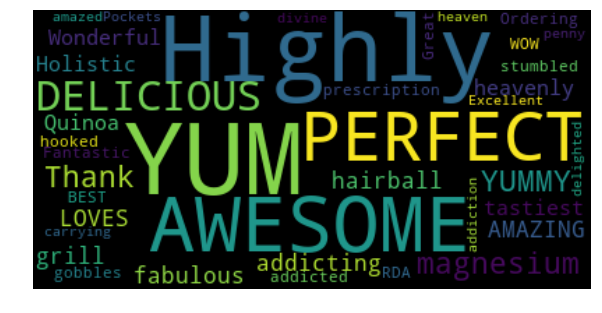

In [265]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Calculate the sentence score
- By summation of word score in sentence
- Normalize to 0~1

In [266]:
def get_score(text):
    score = 0
    for word in text:
        if word in energy:
            score += energy[word]
    return score/ len(text)

pd_data['score'] = pd.DataFrame([get_score(text) for text in texts])

In [267]:
pd_data['score'] = pd_data['score'] / pd_data['score'].max()

In [268]:
pd_data['score'][:20]

0     0.262223
1     0.203226
2     0.251097
3     0.264870
4     0.300757
5     0.257348
6     0.287302
7     0.330357
8     0.254140
9     0.322087
10    0.277661
11    0.269631
12    0.275572
13    0.356783
14    0.309248
15    0.275304
16    0.302950
17    0.298709
18    0.232803
19    0.310178
Name: score, dtype: float64

## Searching the best threshold

(26, 0.7631083605709521)

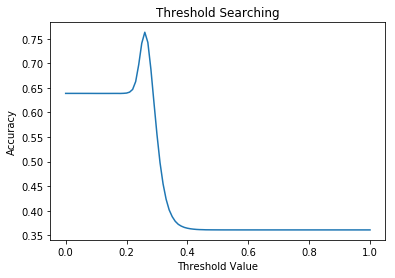

In [269]:
def threshold_searching(left=0, right=1, num_thresholds=101):
    record = []
    for i in np.linspace(left, right, num_thresholds):
        record.append(((pd_data['score'] > i).astype('int') == pd_data['label']).sum() / len(pd_data))
    plt.title('Threshold Searching')
    plt.xlabel('Threshold Value')
    plt.ylabel('Accuracy')
    plt.plot(np.linspace(left, right, num_thresholds), record)
    return record.index(max(record)), max(record)

threshold_searching()